# Handout 3

In [ ]:
# Randomization on page 5

In [2]:
#gamma function
from scipy.special import gamma
gamma([0,0.5,1,5])

array([         inf,   1.77245385,   1.        ,  24.        ])

In [30]:
#F distrubtion
from scipy.stats import f
print(1-f.cdf(2,10,10))
#non-central F-distribution
from scipy.stats import ncf
print(1-ncf.cdf(4.0666,3,8,12.93))

0.144845806026
0.650663987755


                 sum_sq    df           F        PR(>F)
C(treatment)  51.620445   3.0  155.174576  2.782781e-09
Residual       1.219755  11.0         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     155.2
Date:                Sun, 01 Jul 2018   Prob (F-statistic):           2.78e-09
Time:                        12:01:25   Log-Likelihood:                -2.4636
No. Observations:                  15   AIC:                             12.93
Df Residuals:                      11   BIC:                             15.76
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std er

C:\Users\gccar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


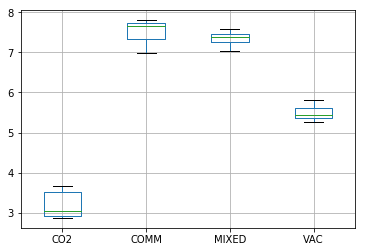

In [25]:
#replicate R code on page 27, storage.R
#numpy and pandas are dependents
%matplotlib inline
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# specify the treatments as a "stacked" data set
treatment = ["COMM"]*3 + ["VAC"]*3 + ["MIXED"]* 4 + ["CO2"]* 5

# specify the counts as a "stacked" data set
counts = [7.66, 6.98, 7.80,5.26, 5.44, 5.80,7.41, 7.33, 
           7.04, 7.59,3.51, 2.91, 3.66, 2.87, 3.04]

data = pd.DataFrame({'treatment':treatment,
                    'counts':counts})

formula = 'counts ~ C(treatment)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)
print(model.summary())
datab = data.pivot(columns='treatment',values='counts')
datab.boxplot()

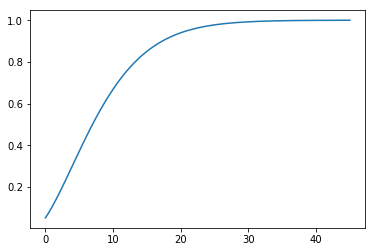

In [42]:
#need an equivalent to power of the anova test in R?

#replicate powerf_specL.sas?

#replicate powerf.R on page 36, powerf  on ecampus was something different
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import f
from scipy.stats import ncf
import pandas as pd
import numpy as np
from math import sqrt
t,r=4,7
n=t*(r-1)
alpha=.05
df1=t-1
df2=n-t
L=np.arange(0,45,.05)
phi = [sqrt(L1/t) for L1 in L]
P=[1-ncf.cdf(f.ppf(1-alpha,df1,df2),df1,df2,L2) for L2 in L]
output=pd.DataFrame({'L':L,'P':P,'phi':phi})
plt.plot(L,P)
#add trimmings to the plot
#print(output)

In [45]:
#repsize Approach 3
from math import sqrt
from scipy.stats import f
from scipy.stats import ncf

#lambda is a reserved-ish word in python
#this function differs from what is in the handout
def repapp3(alpha,gamma,t,sigma_a,sigma_e):
    r = 1
    power = 0
    nu1 = t-1
    while(power<gamma):
        r += 1
        nu2 = t*(r-1)
        tau = (sigma_a/sigma_e)**2
        L = -sqrt(1+r*tau)
        Fcv = f.ppf(1-alpha,nu1,nu2)
        C = (1/L**2)*Fcv
        power = 1-f.cdf(C, nu1, nu2)
    return({'r':r,'nu1':nu1,'nu2':nu2,'lambda':L,'power':power})
repapp3(.05,.85,5,2.5,2.7566)

{'lambda': -2.8986966327041137,
 'nu1': 4,
 'nu2': 40,
 'power': 0.86949471542970469,
 'r': 9}

In [49]:
#repsize approach 4

from math import sqrt
from scipy.stats import f
from scipy.stats import ncf

#lambda is a reserved-ish word in python
#this function differs from what is in the handout
def repApp4(alpha, gamma, t, D, sigma):
    r = 1
    power = 0
    nu1 = t-1
    while(power<gamma):
        r += 1
        nu2 = t*(r-1)
        L = r*t*D**2/sigma**2
        Phi = sqrt(L/t)
        Fcr = f.ppf(1-alpha,nu1,nu2)
        power = 1-ncf.cdf(Fcr, nu1, nu2,L)
    return({'D': D,'t':t, 'r':r,'nu2':nu2,'lambda':L,'Fcr':Fcr,'Phi':Phi, 'power':power})

repApp4(.05,.90,4,.5,.34)

{'D': 0.5,
 'Fcr': 4.0661805513511604,
 'Phi': 2.5471335405424664,
 'lambda': 25.9515570934256,
 'nu2': 8,
 'power': 0.92624736145577824,
 'r': 3,
 't': 4}

In [50]:
#repsize approach 4

from math import sqrt
from scipy.stats import f
from scipy.stats import ncf

#lambda is a reserved-ish word in python
#this function differs from what is in the handout
def repApp5(alpha, gamma, t, D, sigma):
    r = 1
    power = 0
    nu1 = t-1
    while(power<gamma):
        r += 1
        nu2 = t*(r-1)
        L = r*D**2/(2*sigma**2)
        Phi = sqrt(L/t)
        Fcr = f.ppf(1-alpha,nu1,nu2)
        power = 1-ncf.cdf(Fcr, nu1, nu2,L)
    return({'D': D,'t':t, 'r':r,'nu2':nu2,'lambda':L,'Fcr':Fcr,'Phi':Phi, 'power':power})


repApp5(.05,.90,4,.5,.34)

{'D': 0.5,
 'Fcr': 2.7694309320231345,
 'Phi': 2.0136858731807576,
 'lambda': 16.219723183391,
 'nu2': 56,
 'power': 0.91922990589635178,
 'r': 15,
 't': 4}

In [ ]:
#Rcode powerf.R

t=4
r=3
s=.34
df=t*(r-1)
D = seq(0,1.0,.025)
L1 = (D^2)*r*t/s^2
P1 = 1-pf(qf(.95,t-1,df),t-1,df,L1)
L2 = (D^2)*3/(2*0.11585)
P2 = 1-pf(qf(.95,t-1,df),t-1,df,L2)
postscript("u:\meth2\handouts\powerf.ps",height=8,horizontal=F)
P<-cbind(P1,P2)
matplot(D,P,type="l",main="POWER OF F-TEST \n
                     MIN EFFECT SIZE FOR ALL/AT LEAST ONE",
           xlab="MINIMUM EFFECT SIZE (D)", ylab="POWER OF F-TEST",ylim=c(0,1),
           lab=c(20,20,7),col="black",lwd=2,
 cex=.5)
legend(.005,.955,lty=c(1,2),legend=
c("MIN EFFECT FOR ALL","MIN EFFECT AT LEAST ONE"),cex=.4)
graphics.off()

In [57]:
#Matrix algebra in Python
#See numpy docs for more info - I'm not an expert, I'm a plodder

import numpy as np

#page 53
M = np.matrix([[11,3,2,4],[3,3,0,0],[2,0,2,0],[4,0,0,4]])
print(M)
#print the inverse
print(M.I)
L = np.matrix([1,0,1,0])
print(L)
#the @ operator works in 3.5 and above only
L@M.I@L.T

[[11  3  2  4]
 [ 3  3  0  0]
 [ 2  0  2  0]
 [ 4  0  0  4]]
[[ 0.5        -0.5        -0.5        -0.5       ]
 [-0.5         0.83333333  0.5         0.5       ]
 [-0.5         0.5         1.          0.5       ]
 [-0.5         0.5         0.5         0.75      ]]
[[1 0 1 0]]


matrix([[ 0.5]])